# **Import library!**

In [227]:
# Import Neccessary libraries

import numpy as np

import pandas as pd



# Import Visualization libraries

import matplotlib.pyplot as plt

%matplotlib inline

import seaborn as sns



#Import Model

from sklearn.model_selection import train_test_split, GridSearchCV

from sklearn.preprocessing import  LabelEncoder

from sklearn.preprocessing import MinMaxScaler

from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, classification_report

from sklearn.linear_model import LogisticRegression

from sklearn.tree import DecisionTreeClassifier

from sklearn.ensemble import RandomForestClassifier

from sklearn.svm import SVC

from sklearn.ensemble import GradientBoostingClassifier



#import warning libraries

import warnings

warnings.filterwarnings('ignore')

# **Read Data**

In [228]:
diabetes_data=pd.read_csv('diabetes_prediction_dataset.csv')

diabetes_data.head(20)

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0
5,Female,20.0,0,0,never,27.32,6.6,85,0
6,Female,44.0,0,0,never,19.31,6.5,200,1
7,Female,79.0,0,0,No Info,23.86,5.7,85,0
8,Male,42.0,0,0,never,33.64,4.8,145,0
9,Female,32.0,0,0,never,27.32,5.0,100,0


In [229]:
# Drop the 'Smoking History' column
diabetes_data = diabetes_data.drop(columns=['smoking_history','hypertension','heart_disease'])
print("'Smoking History,hypertension,heart_disease' columns dropped successfully.")

'Smoking History,hypertension,heart_disease' columns dropped successfully.


In [230]:

diabetes_data.head(5)

,gender,age,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,25.19,6.6,140,0
1,Female,54.0,27.32,6.6,80,0
2,Male,28.0,27.32,5.7,158,0
3,Female,36.0,23.45,5.0,155,0
4,Male,76.0,20.14,4.8,155,0


# **EDA**

In [231]:
# define the data type for each columns and null

diabetes_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 6 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   bmi                  100000 non-null  float64
 3   HbA1c_level          100000 non-null  float64
 4   blood_glucose_level  100000 non-null  int64  
 5   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(2), object(1)
memory usage: 4.6+ MB


In [232]:
# define the data type for each columns

diabetes_data.dtypes

,0
gender,object
age,float64
bmi,float64
HbA1c_level,float64
blood_glucose_level,int64
diabetes,int64


**we have to convert the catigorical data to numerical data**

In [233]:
#check if there is duplicated data

diabetes_data.duplicated()

,0
0,False
1,False
2,False
3,False
4,False
...,...
99995,True
99996,False
99997,False
99998,False


**we should remove duplicates**

In [234]:
#check the number of duplicated data

diabetes_data.duplicated().sum()

np.int64(9627)

In [235]:
#remove duplicates

diabetes_data.drop_duplicates(inplace=True)

diabetes_data.duplicated().sum()

np.int64(0)

In [236]:
#check if there is missing values

diabetes_data.isna().sum()

,0
gender,0
age,0
bmi,0
HbA1c_level,0
blood_glucose_level,0
diabetes,0


 **no missing values**

In [237]:
#checking the number of rows and columns of the dataset

diabetes_data.shape

(90373, 6)

In [238]:
#generate descriptive statistics

diabetes_data.describe()

,age,bmi,HbA1c_level,blood_glucose_level,diabetes
count,90373.000000,90373.000000,90373.000000,90373.000000,90373.000000
mean,41.415258,27.322562,5.539434,138.456597,0.092793
std,22.554542,6.979585,1.077743,41.215919,0.290144
min,0.080000,10.010000,3.500000,80.000000,0.000000
25%,23.000000,23.040000,4.800000,100.000000,0.000000
50%,43.000000,27.320000,5.800000,140.000000,0.000000
75%,59.000000,30.250000,6.200000,159.000000,0.000000
max,80.000000,95.690000,9.000000,300.000000,1.000000


In [239]:
#count the unique values in diabetes column

diabetes_data['diabetes'].value_counts()

,count
diabetes,
0,81987
1,8386


In [240]:
#count the unique values in heart_disease column

# diabetes_data['heart_disease'].value_counts()

In [241]:
#count the unique values in gender column

diabetes_data['gender'].value_counts()

,count
gender,
Female,52720
Male,37635
Other,18


# **Data Visalustion**

array([[<Axes: title={'center': 'age'}>, <Axes: title={'center': 'bmi'}>],
       [<Axes: title={'center': 'HbA1c_level'}>,
        <Axes: title={'center': 'blood_glucose_level'}>],
       [<Axes: title={'center': 'diabetes'}>, <Axes: >]], dtype=object)

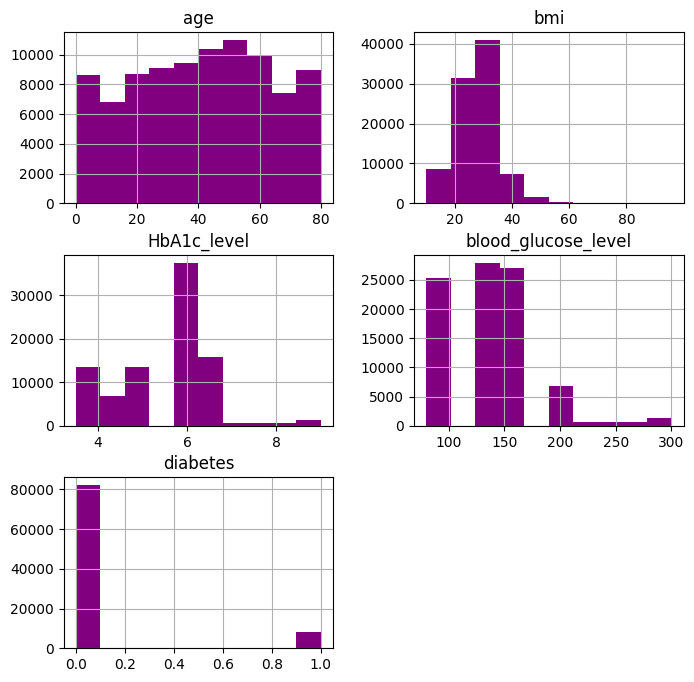

In [242]:
diabetes_data.hist(figsize=(8,8), color='purple')

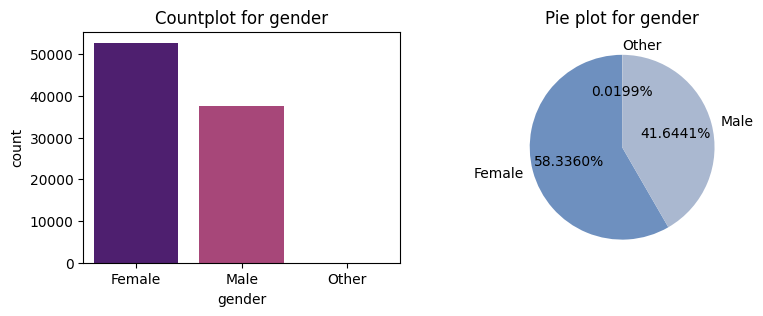

In [243]:
fig, ax = plt.subplots(1, 2, figsize=(9, 3))

# Countplot

sns.countplot(x=diabetes_data['gender'],data=diabetes_data ,palette='magma' ,ax=ax[0])

ax[0].set_title(f'Countplot for gender')

# Pie plot

data_counts = diabetes_data['gender'].value_counts()

ax[1].pie(data_counts, labels=data_counts.index, autopct='%1.4f%%', startangle=90, colors=sns.color_palette('vlag'))

ax[1].set_title(f'Pie plot for gender')

plt.show()

In [182]:
# fig, ax = plt.subplots(1, 2, figsize=(9, 3))

# # Countplot

# sns.countplot(x=diabetes_data['hypertension'],data=diabetes_data ,palette='magma' ,ax=ax[0])

# ax[0].set_title(f'Countplot for hypertension')

# # Pie plot

# data_counts = diabetes_data['hypertension'].value_counts()

# ax[1].pie(data_counts, labels=data_counts.index, autopct='%1.4f%%', startangle=90, colors=sns.color_palette('vlag'))

# ax[1].set_title(f'Pie plot for hypertension')

# plt.show()


In [244]:
# fig, ax = plt.subplots(1, 2, figsize=(9, 3))

# # Countplot

# sns.countplot(x=diabetes_data['heart_disease'],data=diabetes_data ,palette='magma' ,ax=ax[0])

# ax[0].set_title(f'Countplot for heart_disease')

# # Pie plot

# data_counts = diabetes_data['heart_disease'].value_counts()

# ax[1].pie(data_counts, labels=data_counts.index, autopct='%1.4f%%', startangle=90, colors=sns.color_palette('vlag'))

# ax[1].set_title(f'Pie plot for heart_disease')

# plt.show()

Text(0.5, 1.0, 'Pie plot for diabetes')

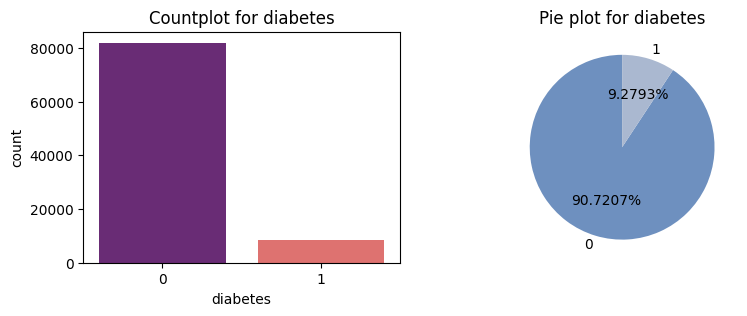

In [245]:
fig, ax = plt.subplots(1, 2, figsize=(9, 3))

# Countplot

sns.countplot(x=diabetes_data['diabetes'],data=diabetes_data ,palette='magma' ,ax=ax[0])

ax[0].set_title(f'Countplot for diabetes')

# Pie plot

data_counts = diabetes_data['diabetes'].value_counts()

ax[1].pie(data_counts, labels=data_counts.index, autopct='%1.4f%%', startangle=90, colors=sns.color_palette('vlag'))

ax[1].set_title(f'Pie plot for diabetes')

In [246]:
print(diabetes_data['age'].mean())

41.415258096997995


**Average range of people with diabetes in age 41**




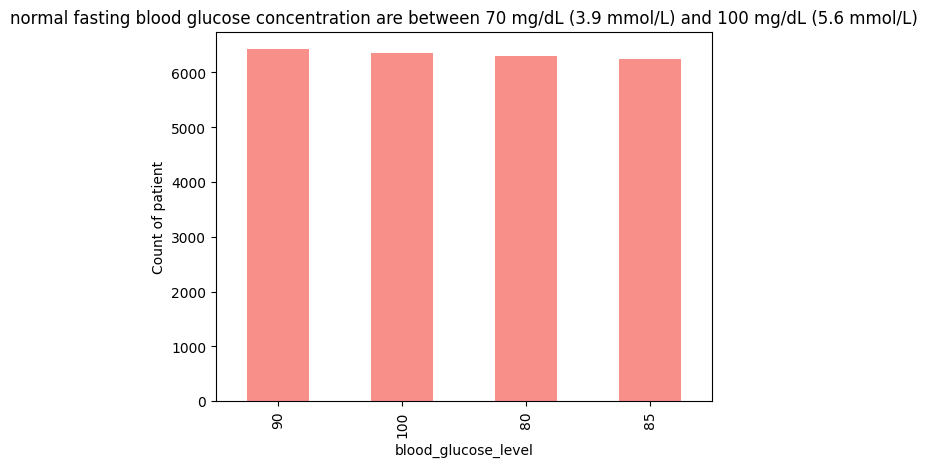

In [247]:

blood_glucose_level_above_70_and_less_than_100 = diabetes_data[(diabetes_data['blood_glucose_level'] <= 100) & (diabetes_data['blood_glucose_level'] >= 70)]

blood_glucose_level_above_70_and_less_than_100['blood_glucose_level'].value_counts().plot(kind='bar', color='#F89089')

plt.title('normal fasting blood glucose concentration are between 70 mg/dL (3.9 mmol/L) and 100 mg/dL (5.6 mmol/L)')

plt.xlabel('blood_glucose_level')

plt.ylabel('Count of patient')

plt.show()

**The expected values for normal fasting blood glucose concentration are between 70 mg/dL (3.9 mmol/L) and 100 mg/dL (5.6 mmol/L). When fasting blood glucose is between 100 to 125 mg/dL (5.6 to 6.9 mmol/L) changes in lifestyle and monitoring glycemia are recommended ** **bold text**

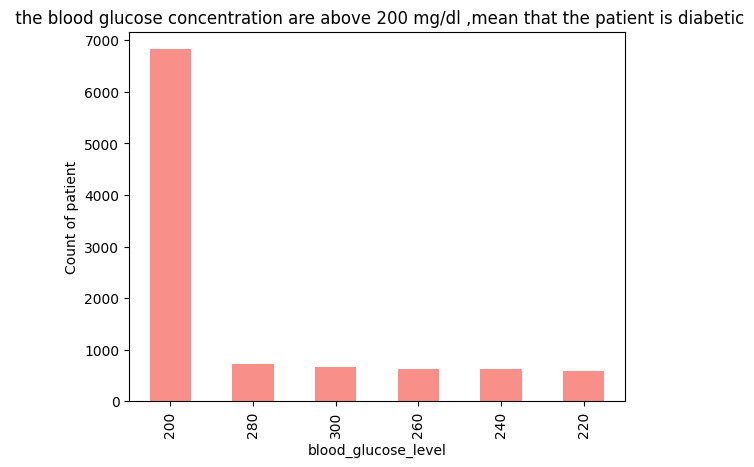

In [248]:
blood_glucose_level_above_200=diabetes_data[diabetes_data['blood_glucose_level']>=200]

blood_glucose_level_above_200['blood_glucose_level'].value_counts().plot(kind='bar', color='#F89089')

plt.title(' the blood glucose concentration are above 200 mg/dl ,mean that the patient is diabetic')

plt.xlabel('blood_glucose_level')

plt.ylabel('Count of patient')

plt.show()

**A normal A1C level is below 5.7%, a level of 5.7% to 6.4% indicates prediabetes, and a level of 6.5% or more indicates diabetes.**

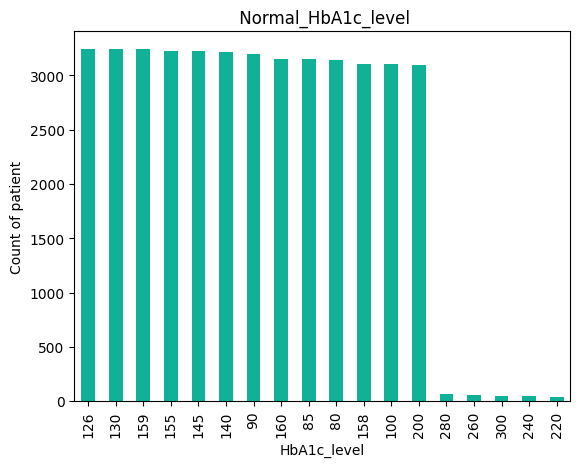

In [249]:
Normal_HbA1c_level=diabetes_data[diabetes_data['HbA1c_level']<=5.7]

Normal_HbA1c_level['blood_glucose_level'].value_counts().plot(kind='bar', color='#11B198')

plt.title(' Normal_HbA1c_level')

plt.xlabel('HbA1c_level')

plt.ylabel('Count of patient')

plt.show()

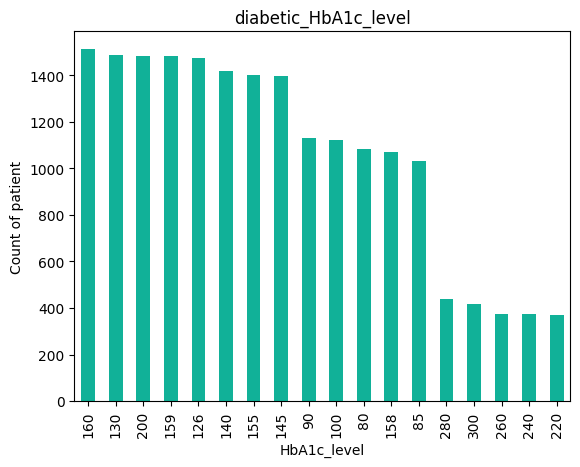

In [250]:
diabetic_HbA1c_level=diabetes_data[diabetes_data['HbA1c_level']>=6.5]

diabetic_HbA1c_level['blood_glucose_level'].value_counts().plot(kind='bar', color='#11B198')

plt.title('diabetic_HbA1c_level')

plt.xlabel('HbA1c_level')

plt.ylabel('Count of patient')

plt.show()

**Is hypertension more common in males or females?

A greater percentage of men (50%) have high blood pressure than women (44%)**


***note that the number of females in this data set is 56161 ,and male is 39967 ***

In [190]:
#  plt.figure(figsize=(6, 3))

# sns.countplot(x=diabetes_data['gender'], hue=diabetes_data['hypertension'], data=diabetes_data ,palette='vlag' )

# plt.title('countplot of male and female with respect to hypertension')

# plt.show()

**Worldwide, an estimated 17.7 million more men than women have diabetes mellitus.**

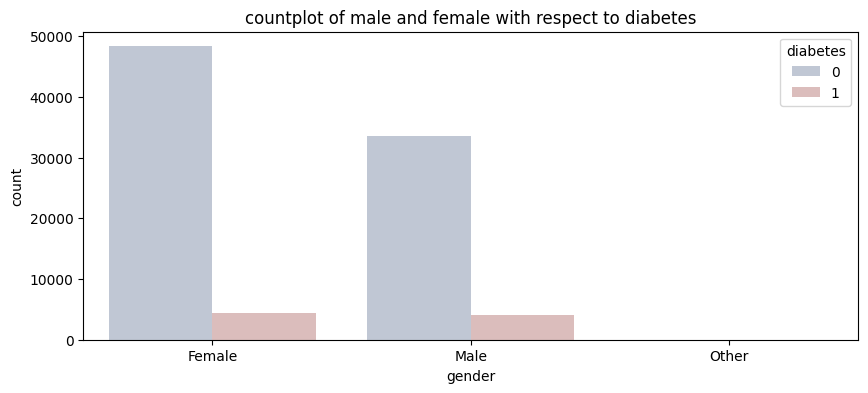

In [251]:
plt.figure(figsize=(10, 4))

sns.countplot(x=diabetes_data['gender'], hue=diabetes_data['diabetes'], data=diabetes_data ,palette='vlag' )

plt.title('countplot of male and female with respect to diabetes')

plt.show()

In [252]:
diabetes_data.head()

,gender,age,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,25.19,6.6,140,0
1,Female,54.0,27.32,6.6,80,0
2,Male,28.0,27.32,5.7,158,0
3,Female,36.0,23.45,5.0,155,0
4,Male,76.0,20.14,4.8,155,0


In [253]:
#converting categorical data into numerical data

encoder=LabelEncoder()

diabetes_data['gender']=encoder.fit_transform(diabetes_data['gender'])

# **Spliting Data**

In [254]:
X = diabetes_data.drop('diabetes', axis=1)

y = diabetes_data['diabetes']

In [255]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size = 0.2)

In [256]:
X_train.shape,X_test.shape,X.shape

((72298, 5), (18075, 5), (90373, 5))

# **LogisticRegression Model**

In [257]:
lr=LogisticRegression(max_iter=3000)

lr.fit(X_train,y_train)

LogisticRegression(max_iter=3000)

In [258]:
y_predection=lr.predict(X_test)

In [259]:
lr_accuracy = accuracy_score(y_test, y_predection)

lr_conf_matrix = confusion_matrix(y_test, y_predection)

lr_classification_rep = classification_report(y_test, y_predection)

In [260]:
print(f'lr_Accuracy: {lr_accuracy:.2f}')

print('\nlr_Confusion Matrix:')

print(lr_conf_matrix)

print('\nlr_Classification Report:')

print(lr_classification_rep)

lr_Accuracy: 0.96

lr_Confusion Matrix:
[[16274   169]
 [  621  1011]]

lr_Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.99      0.98     16443
           1       0.86      0.62      0.72      1632

    accuracy                           0.96     18075
   macro avg       0.91      0.80      0.85     18075
weighted avg       0.95      0.96      0.95     18075



****Checking for the over and under fiting ****

In [261]:
print("Training Score:",lr.score(X_train,y_train)*100,'%')

print("Testing Score:",lr.score(X_test,y_test)*100,'%')

Training Score: 95.66378046418988 %
Testing Score: 95.62932226832642 %


# **SVM Model**

In [82]:
# svm = SVC(kernel = 'linear', random_state = 20)

# svm.fit(X_train, y_train)

In [ ]:
# svm_y_predection=svm.predict(X_test)

In [ ]:
# svm_accuracy = accuracy_score(y_test, svm_y_predection)

# svm_conf_matrix = confusion_matrix(y_test, svm_y_predection)

# svm_classification_rep = classification_report(y_test, svm_y_predection)

In [ ]:
# print(f'svm_Accuracy: {svm_accuracy:.2f}')

# print('\nsvm_Confusion Matrix:')

# print(svm_conf_matrix)

# print('\nsvm_Classification Report:')

# print(svm_classification_rep)

****Checking for the over and under fiting ****

In [ ]:
# print("Training Score:",svm.score(X_train,y_train)*100,'%')

# print("Testing Score:",svm.score(X_test,y_test)*100,'%')

# **DecisionTree Model**

In [262]:
# Define the parameter grid to search

param_grid = {


    'max_depth': [3, 5, 10, None],  # depths to consider

    'min_samples_leaf': [1, 2, 4, 6] } # minimum number of samples required at a leaf node

In [263]:
decision_tree_model = GridSearchCV(DecisionTreeClassifier(), param_grid=param_grid, cv=5)

In [264]:
decision_tree_model.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [3, 5, 10, None],
                         'min_samples_leaf': [1, 2, 4, 6]})

In [265]:
y_pred_dt=decision_tree_model.predict(X_test)

In [266]:
dt_accuracy = accuracy_score(y_test, y_pred_dt)

dt_conf_matrix = confusion_matrix(y_test, y_pred_dt)

dt_classification_rep = classification_report(y_test, y_pred_dt)

In [267]:
print(f'dt_Accuracy: {dt_accuracy:.2f}')

print('\ndt_Confusion Matrix:')

print(dt_conf_matrix)

print('\ndt_Classification Report:')

dt_Accuracy: 0.97

dt_Confusion Matrix:
[[16443     0]
 [  555  1077]]

dt_Classification Report:


**Checking for the over and under fiting**

In [268]:
print("Training Score:",decision_tree_model.score(X_train,y_train)*100,'%')

print("Testing Score:",decision_tree_model.score(X_test,y_test)*100,'%')

Training Score: 96.92522614733464 %
Testing Score: 96.92946058091286 %


# **RandomForest Model**

In [269]:
# Define the parameter grid to search

param_grid_ = {

    'n_estimators': [10, 50, 300, 200],  # Number of trees in the forest

    'max_depth': [None, 10, 20, 30],  # Maximum depth of the tree

    'min_samples_split': [2, 5, 10],  # Minimum number of samples required to split an internal node

    'min_samples_leaf': [1, 2, 4]  # Minimum number of samples required to be at a leaf node

}



# Initialize the grid search model

random_forest_model = GridSearchCV(RandomForestClassifier(), param_grid=param_grid_, cv=2, n_jobs=-1)


In [270]:
random_forest_model = RandomForestClassifier()

random_forest_model.fit(X_train,y_train)

RandomForestClassifier()

In [271]:
y_pred_rf=random_forest_model.predict(X_test)

In [272]:
rf_accuracy = accuracy_score(y_test, y_pred_rf)

rf_conf_matrix = confusion_matrix(y_test, y_pred_rf)

rf_classification_rep = classification_report(y_test, y_pred_rf)

In [273]:
print(f'rf_Accuracy: {rf_accuracy:.3f}')

print('\nrf_Confusion Matrix:')

print(rf_conf_matrix)

print('\nrf_Classification Report:')

print(rf_classification_rep)

rf_Accuracy: 0.964

rf_Confusion Matrix:
[[16320   123]
 [  526  1106]]

rf_Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98     16443
           1       0.90      0.68      0.77      1632

    accuracy                           0.96     18075
   macro avg       0.93      0.84      0.88     18075
weighted avg       0.96      0.96      0.96     18075



**Checking for the over and under fiting**

In [274]:
print("Training Score:",random_forest_model.score(X_train,y_train)*100,'%')

print("Testing Score:",random_forest_model.score(X_test,y_test)*100,'%')

Training Score: 99.72613350300146 %
Testing Score: 96.40940525587828 %


##Multi-Layer Perceptron (MLP) with Dropout Regularization

In [283]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import StandardScaler

# Standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Build the Multi-Layer Perceptron (MLP) with Dropout Regularization
mlp_model = Sequential([
    Dense(256, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    Dropout(0.3),  # Helps prevent overfitting
    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(1, activation='sigmoid')  # Binary classification output layer
])

# Compile the model
mlp_model.compile(optimizer=Adam(learning_rate=0.001),
                  loss='binary_crossentropy',
                  metrics=['accuracy'])

# Train the model
history = mlp_model.fit(X_train_scaled, y_train,
                        epochs=20,
                        batch_size=32,
                        validation_split=0.2,
                        verbose=1)

# Evaluate the model
test_loss, test_accuracy = mlp_model.evaluate(X_test_scaled, y_test)
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")


Epoch 1/20
1808/1808 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9467 - loss: 0.1566 - val_accuracy: 0.9645 - val_loss: 0.1004
Epoch 2/20
1808/1808 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9656 - loss: 0.1001 - val_accuracy: 0.9660 - val_loss: 0.0973
Epoch 3/20
1808/1808 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9657 - loss: 0.0995 - val_accuracy: 0.9676 - val_loss: 0.0941
Epoch 4/20
1808/1808 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9675 - loss: 0.0957 - val_accuracy: 0.9676 - val_loss: 0.0962
Epoch 5/20
1808/1808 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.9686 - loss: 0.0921 - val_accuracy: 0.9677 - val_loss: 0.0935
Epoch 6/20
1808/1808 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9667 - loss: 0.0955 - val_accuracy: 0.9661 - val_loss: 0.1006
Epoch 7/20
1808/1808 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9689 - loss: 0.0928 - val_accuracy: 0.9665 - val_loss: 0.0952
Epoch 8/20
1808/1808 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.9677 - loss: 0.0945

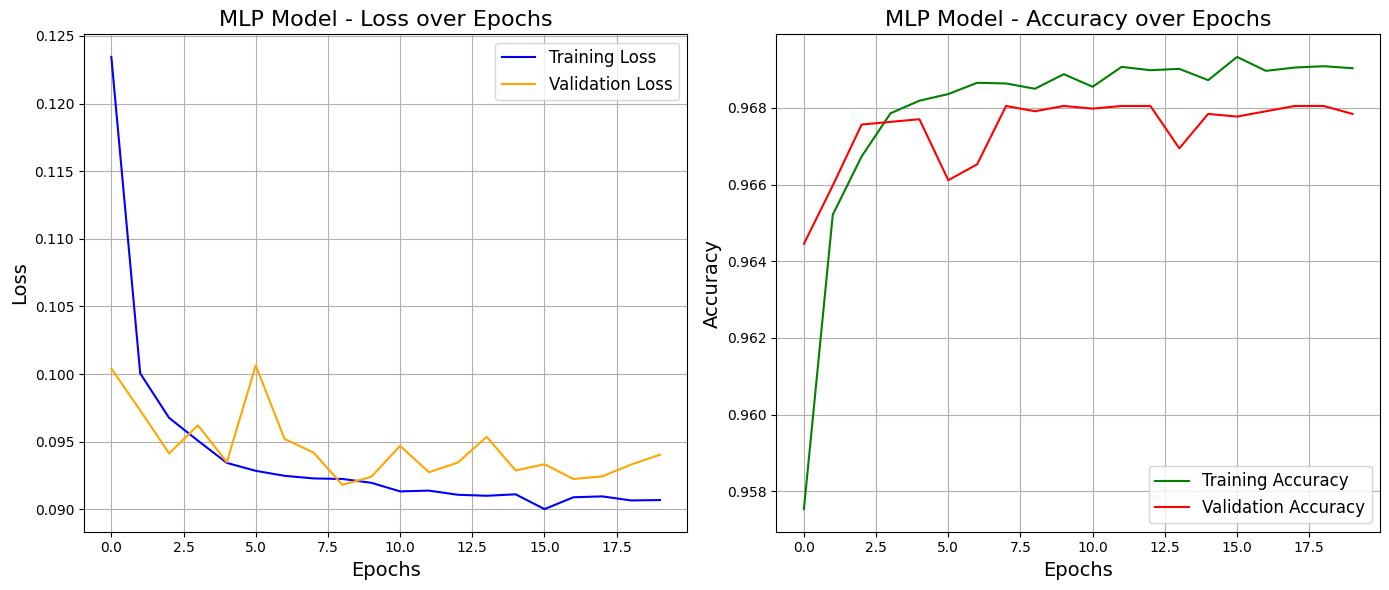

In [284]:
import matplotlib.pyplot as plt

# Plot training and validation metrics for the MLP model
plt.figure(figsize=(14, 6))

# Plot training and validation loss
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss', color='blue')
plt.plot(history.history['val_loss'], label='Validation Loss', color='orange')
plt.title('MLP Model - Loss over Epochs', fontsize=16)
plt.xlabel('Epochs', fontsize=14)
plt.ylabel('Loss', fontsize=14)
plt.legend(fontsize=12)
plt.grid(True)

# Plot training and validation accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy', color='green')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', color='red')
plt.title('MLP Model - Accuracy over Epochs', fontsize=16)
plt.xlabel('Epochs', fontsize=14)
plt.ylabel('Accuracy', fontsize=14)
plt.legend(fontsize=12)
plt.grid(True)

plt.tight_layout()
plt.show()


#LSTM

In [288]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam
import numpy as np

# Reshape the data for LSTM (LSTM expects 3D input: samples, timesteps, features)
X_train_lstm = np.reshape(X_train_scaled, (X_train_scaled.shape[0], 1, X_train_scaled.shape[1]))
X_test_lstm = np.reshape(X_test_scaled, (X_test_scaled.shape[0], 1, X_test_scaled.shape[1]))

# Build the LSTM model
LSTM_model = Sequential([
    LSTM(128, activation='relu', input_shape=(X_train_lstm.shape[1], X_train_lstm.shape[2]), return_sequences=True),
    Dropout(0.4),
    LSTM(64, activation='relu', return_sequences=False),
    Dropout(0.4),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')  # Binary classification output layer
])

# Compile the model
LSTM_model.compile(optimizer=Adam(learning_rate=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Train the model
history = LSTM_model.fit(X_train_lstm, y_train,
                    epochs=20,
                    batch_size=32,
                    validation_split=0.2,
                    verbose=1)

# Evaluate the model
test_loss, test_accuracy = LSTM_model.evaluate(X_test_lstm, y_test)
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")


Epoch 1/20
1808/1808 ━━━━━━━━━━━━━━━━━━━━ 65s 8ms/step - accuracy: 0.9366 - loss: 0.2041 - val_accuracy: 0.9615 - val_loss: 0.1107
Epoch 2/20
1808/1808 ━━━━━━━━━━━━━━━━━━━━ 19s 7ms/step - accuracy: 0.9618 - loss: 0.1069 - val_accuracy: 0.9649 - val_loss: 0.1010
Epoch 3/20
1808/1808 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.9635 - loss: 0.1041 - val_accuracy: 0.9667 - val_loss: 0.0975
Epoch 4/20
1808/1808 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.9648 - loss: 0.1008 - val_accuracy: 0.9665 - val_loss: 0.0974
Epoch 5/20
1808/1808 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.9680 - loss: 0.0944 - val_accuracy: 0.9665 - val_loss: 0.0963
Epoch 6/20
1808/1808 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.9672 - loss: 0.0944 - val_accuracy: 0.9662 - val_loss: 0.0965
Epoch 7/20
1808/1808 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.9676 - loss: 0.0940 - val_accuracy: 0.9678 - val_loss: 0.0930
Epoch 8/20
1808/1808 ━━━━━━━━━━━━━━━━━━━━ 21s 7ms/step - accuracy: 0.9687 - loss: 0

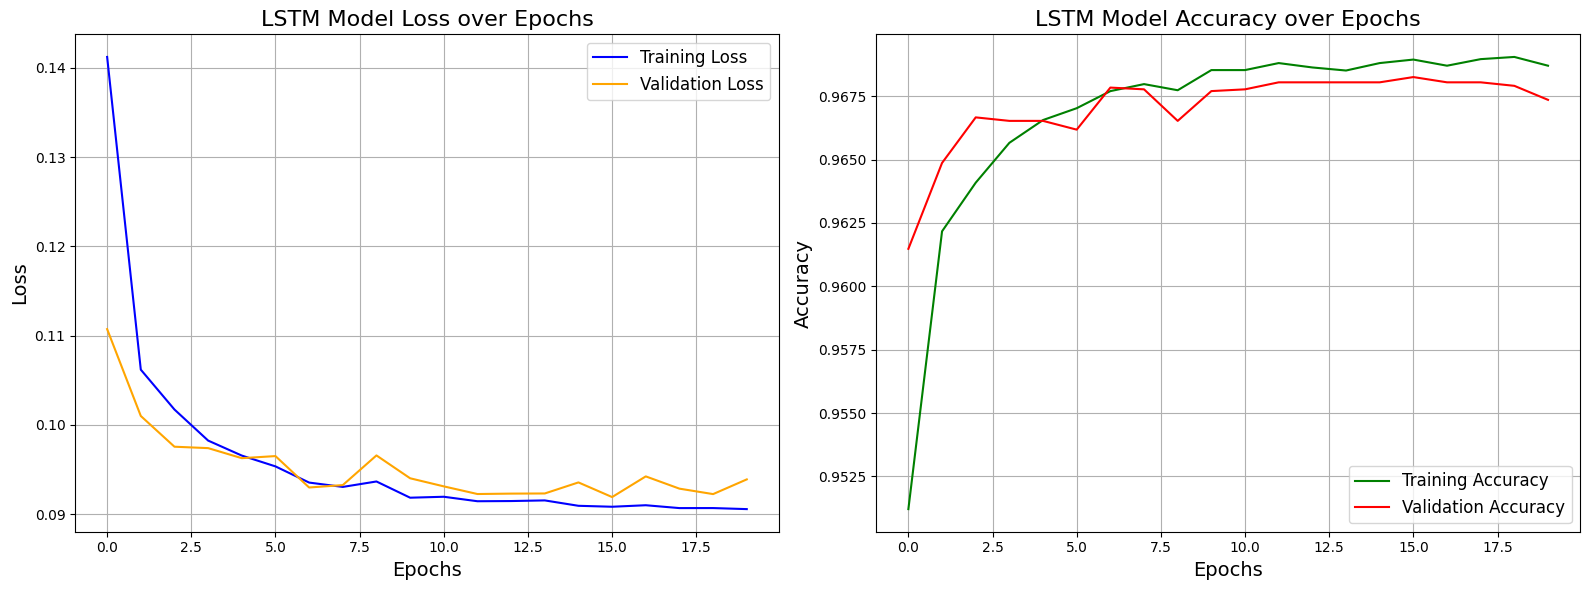

In [290]:
import matplotlib.pyplot as plt

# Create a figure and set the size
plt.figure(figsize=(16, 6))

# Plot training and validation loss on the first subplot
plt.subplot(1, 2, 1)  # (rows, columns, index)
plt.plot(history.history['loss'], label='Training Loss', color='blue')
plt.plot(history.history['val_loss'], label='Validation Loss', color='orange')
plt.title('LSTM Model Loss over Epochs', fontsize=16)  # Title for the loss graph
plt.xlabel('Epochs', fontsize=14)
plt.ylabel('Loss', fontsize=14)
plt.legend(fontsize=12)
plt.grid(True)

# Plot training and validation accuracy on the second subplot
plt.subplot(1, 2, 2)  # (rows, columns, index)
plt.plot(history.history['accuracy'], label='Training Accuracy', color='green')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', color='red')
plt.title('LSTM Model Accuracy over Epochs', fontsize=16)  # Title for the accuracy graph
plt.xlabel('Epochs', fontsize=14)
plt.ylabel('Accuracy', fontsize=14)
plt.legend(fontsize=12)
plt.grid(True)

# Show the plots
plt.tight_layout()  # Adjust layout to avoid overlap
plt.show()


# **Making a Predictive System**

In [303]:
input_data = (1,80.0,25.19,6.6,140)



# changing the input_data to numpy array

input_data_as_numpy_array = np.asarray(input_data)



# reshape the array as we are predicting for one instance

input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)



prediction = random_forest_model.predict(input_data_reshaped)

print(prediction)



if (prediction[0] == 0):

  print('The person is not diabetic')

else:

  print('The person is diabetic')

[0]
The person is not diabetic


# **Saving the trained model**

In [305]:
# Save the model weights
mlp_model.save_weights('mlp_model_weights.weights.h5')  # Correct file extension
print("Model weights saved successfully.")

# To load the weights later (if needed):
# Rebuild the model with the same architecture
mlp_model_loaded = Sequential([
    Dense(256, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    Dropout(0.3),
    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(1, activation='sigmoid')
])

# Load the saved model weights
mlp_model_loaded.load_weights('mlp_model_weights.weights.h5')  # Correct file extension
print("Model weights loaded successfully.")

# Now you can use the loaded model to make predictions, for example:
input_data = (1, 80.0, 25.19, 6.6, 140)  # Example input data for prediction

# Convert the input data to a numpy array
input_data_as_numpy_array = np.asarray(input_data)

# Reshape the array as we are predicting for one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1, -1)

# Ensure the input data is scaled the same way as the training data
input_data_scaled = scaler.transform(input_data_reshaped)

# Predict using the trained model
prediction = mlp_model_loaded.predict(input_data_scaled)

# Print the prediction
print("Prediction:", prediction)

# Interpret the prediction (assuming binary classification with 0 and 1)
if prediction[0] < 0.5:
    print('The person is not diabetic')
else:
    print('The person is diabetic')


Model weights saved successfully.
Model weights loaded successfully.
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step
Prediction: [[0.17574558]]
The person is not diabetic


In [ ]:
X_train.columns